# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Install tensorflow if not already installed
%pip install tensorflow
import tensorflow as tf

Note: you may need to restart the kernel to use updated packages.


---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [9]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 100000  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,1,100000.5
1,1,100000.5
2,2,100001.0
3,1,100000.5
4,2,100001.0


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


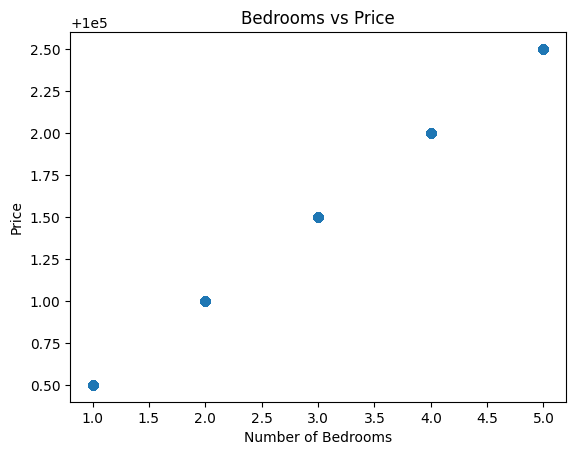

In [10]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [11]:
# update pip installer
%pip install --upgrade pip

# Install necessary packages
%pip install scikit-learn
%pip install numpy

# Features and Labels
X = df['bedrooms']
y = df['price']

print(f"X has shape: {X.shape}")
print(f"Y has shape: {y.shape}")
# TODO Split the data
# YOUR CODE HERE

# set a random seed for reproducibility
random_state=10

# split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print(f"X_train has shape: {X_train.shape}")
print(f"X_test has shape: {X_test.shape}")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
X has shape: (1000,)
Y has shape: (1000,)
X_train has shape: (700,)
X_test has shape: (300,)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [12]:
# TODO Create the model

model =tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])


# TODO Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# TODO print a Summary of the model

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [13]:
# TODO Train the model

trained_model= model.fit(X_train, y_train, epochs=500)



Epoch 1/500


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 4026918912.0000
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 1318687872.0000
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 1075606912.0000
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 965869888.0000
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 826861184.0000
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 720183552.0000
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 648710464.0000
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 517220416.0000
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 486621760.0000
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 399371936.0000
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 368642080.0000
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 289028320.0000
Epoch 13/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 255327680.0000
Epoch 14/500
22/2

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


Evaluate on test data
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0389
test loss, test acc: 0.03895121440291405
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


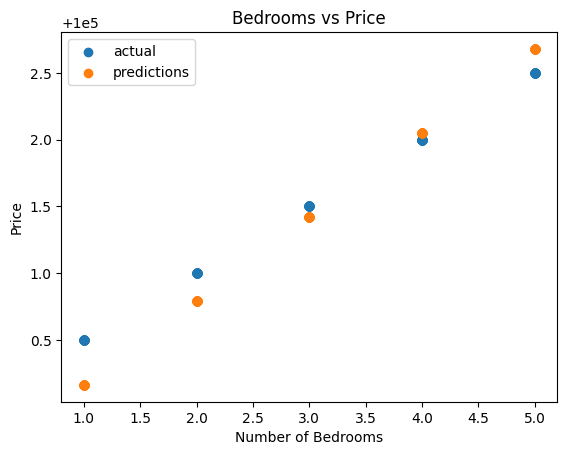

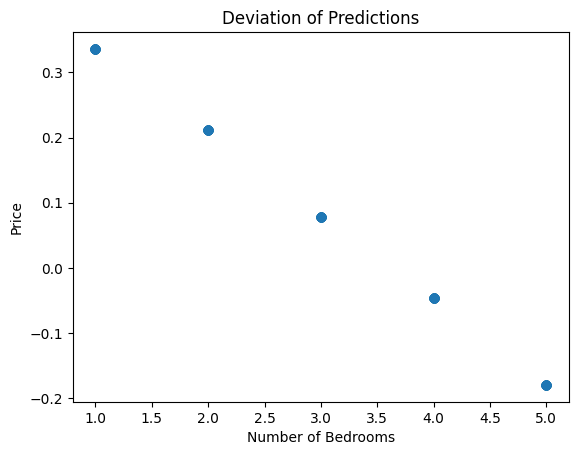

In [14]:
# TODO Evaluate the model on the test data using the model.evaluate() function
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)


# Generate predictions on new data using `predict`
predictions = model.predict(X_test).flatten()

# Plot the predictions vs the actual values
plt.scatter(X_test, y_test, label='actual')
plt.scatter(X_test, predictions, label='predictions')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.legend()
plt.show()

# create a plot that shows the actual deviations from the predictions
plt.scatter(X_test, y_test - predictions)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Deviation of Predictions')
plt.show()





# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.